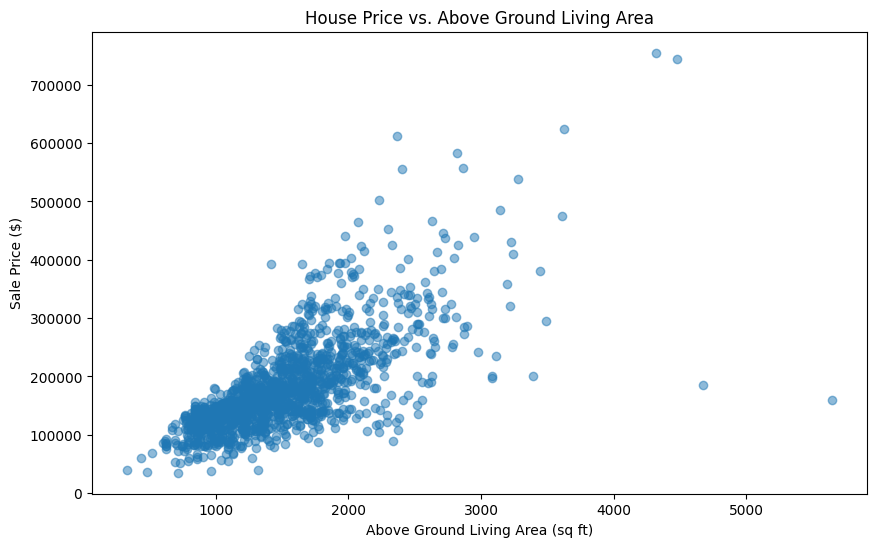

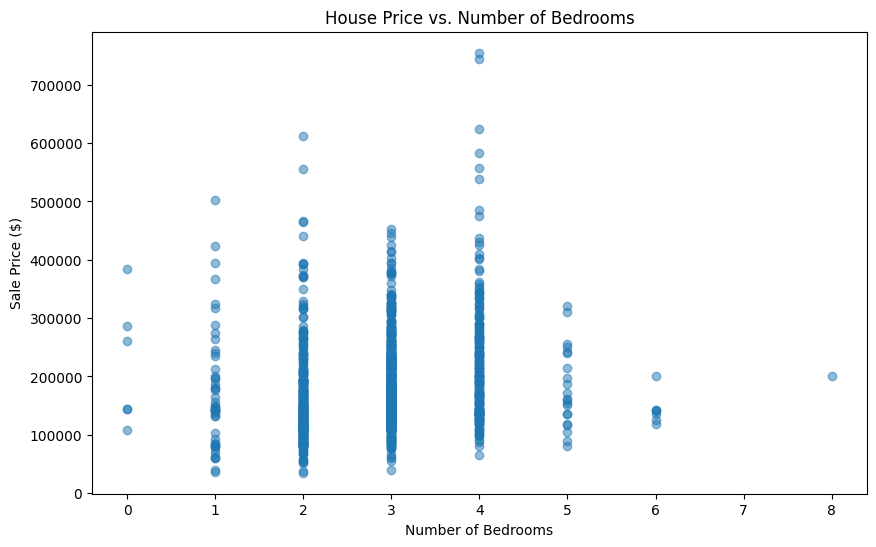

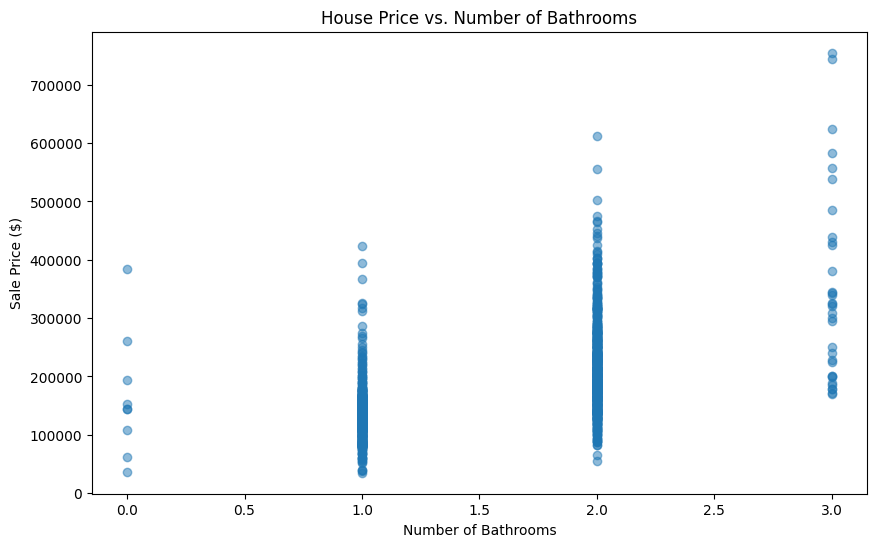

In [ ]:
# Visualize the relationship between GrLivArea and SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(train_data['GrLivArea'], train_data['SalePrice'], alpha=0.5)
plt.title('House Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# Visualize the relationship between BedroomAbvGr and SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(train_data['BedroomAbvGr'], train_data['SalePrice'], alpha=0.5)
plt.title('House Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($)')
plt.show()

# Visualize the relationship between FullBath and SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(train_data['FullBath'], train_data['SalePrice'], alpha=0.5)
plt.title('House Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price ($)')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data
print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
target = 'SalePrice'

X = train_data[features]
y = train_data[target]

# Preprocessing for numerical data
numerical_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ]
)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GrLivArea', 'BedroomAbvGr',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt'])])),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2252408558.2835526
R^2 Score: 0.7063477487863505


In [ ]:
# Preprocess the test data
X_test = test_data[features]

# Predict house prices on the test set
test_preds = model.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_preds})
submission.to_csv('submission.csv', index=False)
print(submission.head())


     Id      SalePrice
0  1461  121832.007924
1  1462  145975.681233
2  1463  210646.837849
3  1464  213966.415251
4  1465  186988.409736


In [ ]:
# Function to predict house price based on user input
def predict_house_price(gr_liv_area, bedrooms, full_bath, tot_rms_abv_grd, year_built):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'GrLivArea': [gr_liv_area],
        'BedroomAbvGr': [bedrooms],
        'FullBath': [full_bath],
        'TotRmsAbvGrd': [tot_rms_abv_grd],
        'YearBuilt': [year_built]
    })

    # Predict the house price using the trained model
    predicted_price = model.predict(input_data)

    return predicted_price[0]

# Example user input
user_gr_liv_area = 2000
user_bedrooms = 3
user_full_bath = 2
user_tot_rms_abv_grd = 7
user_year_built = 1995

predicted_price = predict_house_price(user_gr_liv_area, user_bedrooms, user_full_bath, user_tot_rms_abv_grd, user_year_built)
print(f'Predicted House Price: ${predicted_price:.2f}')


Predicted House Price: $249908.64
